# Image classification and product recommendation

#### DS 862 - Final Project
#### Authors
* Divya Raghunathan
* Syed Asim
* Sairaj Rege

# Table of Contents


* [I: Abstract](#one)
* [II: Introduction](#two)
* [III: Methodology](#three)
* [IV: Data Collection](#four)
* [V: Data Cleaning](#five)
* [VI: Exploratory Data Analysis ](#six)
* [Part I : Image Classification](#1)
* [Part II : Product Recommendation](#2)
    * [Text Based Recommendation ](#2.1)
    * [Image Based Recommendation](#2.2)
* [VII: Results](#seven)
* [VIII: Future Work](#eight)
* [IX: Conclusion](#nine)

# **I: Abstract** <a class="anchor" id="one"></a>

The aim of the project is to classify **Amazon products and to make recommendations based on images, title and brand information**. The images are based on 5 categories/types of apparel scraped from Amazon. The categories are hats, watches, tshirts, shoes and bags. 

The first part of the project trains and tests an image classification model. 

The second part of the project is divided into three subcategories of recommendation engine- 

1) The first recommendation engine takes in images from the user and recommends products solely based on image similarity, 

2) The second recommendation engines takes the product's title and recommendes products that has a high similarity score based on the title 

3) The final recommendation engine takes into account the title and brand information and recommendes products that has a high similarity score based on the title and brand name.

The three recommendation engines are compared against each other and some conclusions are drawn. 



# **II: Introduction** <a class="anchor" id="two"></a>

In the online marketplace world, companies make use of user history and product data to make recommendations to user. The data collected to make these recommendations are search terms, purchase history, product category, items in cart information and many more. Most commonly, recommendation engines make use of text based keyword matches to identify products that consumers may like. Another alternative and less widely used technique is to make use of images to compare product similarity. Images may be better representative of consumers interest than text. This is the comparison we will be making in this project. 

In this project, we present a smart engine for on-line shopping that takes image as an input and then tries to understand the information about the features from the images. We first use neural network to classify the input image as one of the product categories. Then use neural network and memory based similarity methods to calulcate the similarity between product images and product description, which will be used to recommend other similar products from our database. 


# **III: Methodology** <a class="anchor" id="three"></a>

This project is a complete end-to-end data science project, starting from data scraping to partial deployment. A high level overview of the steps is shown in figure 1.

![title](images_note/end2end.png)

                                            Figure 1: Overview of the project

The data collection process involes scraping data from Amazon and storing it in a CSV file. A further description of the data collection process and the data can be viewed in section IV. The scraped data has many missing values and discrepancies. An initial cleaning process was done in Excel and further cleaning is done in section V. The data cleaning is followed by exploratory data analysis where we try to understand the data a bit further. The exploratory data analysis is explained in section VI. Now we have our data ready for image classification and building a recommendation engine. 


#### Image Classification

![Image_classification](images_note/Image_classification.png)

                                       Figure 2: Image classification process

The above diagram describes the flow of steps performed in the image classification process. As already stated above, the data is scraped directly from amazon website using a tool called `parsehub`. Since the images were saved in a csv file as a link, a function is created which extracts the images from the links and then they are stored into arrays. This is followed by the normalization of the images after doing the train/test split. Now the image classification model is built using 3 maxpooling layers and 20 percent of training data for validation. After which the confusion matrix is created to check the accuracy on the test set. Finally random images are picked up from the test data and our model identifies its categories.

#### Recommendation Engine

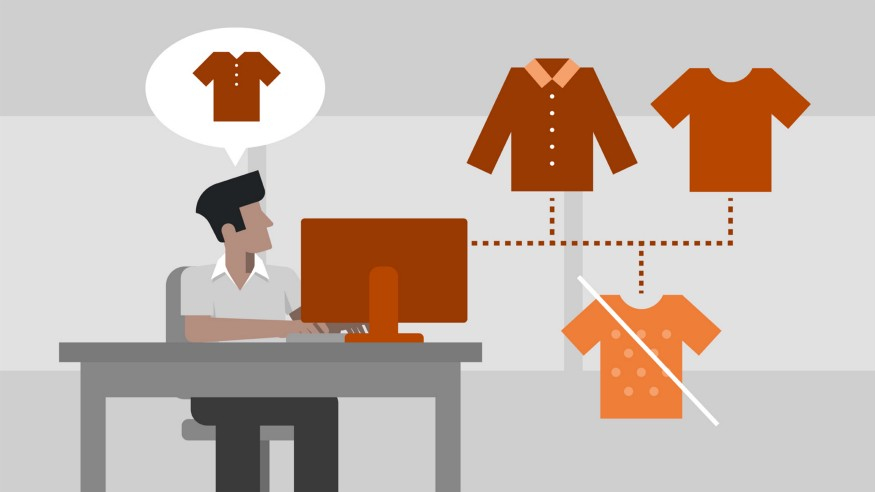

In [1]:
from IPython.display import Image
Image(filename ="images_note/recommend.jpeg", width=500, height=500)

    Figure 3: Recommendation engine (Source : Wikepedia)

The second part of the project deals with recommending the most suitable products to users based on the current selection and choice of the product. Our model relies on the fact that multiple features can be extracted from images and text and used for similarity computation.

![title](images_note/output.png)

                                Figure 4: Recommendation engine flowchart

The above flowchart describes the steps involved in building the recommendation engine. 


The recommendation engine we build in this project is a content based method. In a content based method, we look at the product features to recommend other similar products based on product attributes (figure 5). 

<img src="images_note/content.png" width="400">

                                              Figure 5: Content based filtering

We build two recommendation engines in this project. The first type is image based recommendatione engine and second type is text based recommendation engine. 

In order to recommend products based on images, we calculate the cosine similarities between the image features extracted using a pre-trained model. Images were then recommended based on the computed cosine similarities ranked in descending order. The higher the cosine similarity, the more semantically similar the recommended image is to the input image.

In the text based recommendation system, the first method is to recommend products based on the product title and second method is to recommend products based on title and brand of the product. 

<img src="images_note/cosine.png" width="500">

                                          Figure 6: Cosine Similarity

In order to recommend products based on text, we calculate the cosine similarities(figure 6) between the text feature (title, title+brand) after getting the Bag of Words.In the product title and brand method, we calculate a cosine similarity score using the formula of weighted average (figure 7) which combines the individual cosine similarity scores along with the weights of each type.  Products were then recommended based on the computed cosine similarities ranked in descending order. The higher the cosine similarity, the more semantically similar the recommended product title (or title+brand) is to the input title.

<img src="images_note/brand_title.png" width="500">

                                                Figure 7: Weight average 

# **IV: Data Collection** <a class="anchor" id="four"></a>

The data was scraped from Amazon.com. A tool called parse hub was used for scraping the content.
The 5 categories we decided are - hats, shoes, shirts, bags and watches. We scraped 10 pages for each of the outputs and the total number of results we got were 2800 rows. An initial cleaning in excel was performed and the data size reduced from 2800 to 2310

We scraped all the information available on the main page of a search (not the product page). A sample search of tshirts is shown below. The information includes the below:

1.   Product title
2.   Product brand
3.   Price
4.   Number of reviews
5.   Rating on a scale of 5 

<img src="images_note/amazon.png" width="500">

                                           Figure 8: Picture from Amazon 

In [2]:
# General imports
from collections import Counter
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import requests
import urllib
import cv2
import re
from io import BytesIO
from PIL import Image
import requests, os
from os import path
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers 
from keras.layers.core import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from wordcloud import WordCloud
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix

In [3]:
# Load data set
data=pd.read_csv("combined.csv")

In [4]:
data

,Product_name,Product_Brand,Product_Image,Product_Price,Product_Reviews,Product_Rating,output
0,Pocket Crossbody Bag With RFID-Protected Wristlet,Baggallini,https://m.media-amazon.com/images/I/61p4Q-A8Or...,33,2014,4.5,bags
1,Women's Greenwald Crossbody Bag,ALDO,https://m.media-amazon.com/images/I/91NYbzZqD5...,60,658,4.6,bags
2,Women's Evie Flap Crossbody Handbag Purse,Relic by Fossil,https://m.media-amazon.com/images/I/91OkgMbLPm...,41,754,4.4,bags
3,Women's Jet Set Item Crossbody Bag,Michael Kors,https://m.media-amazon.com/images/I/61pR+lFnNJ...,96,1314,4.7,bags
4,Signature Jacquard Stripe Zip File Bag,COACH,https://m.media-amazon.com/images/I/61syIwjE48...,105,1405,4.6,bags
...,...,...,...,...,...,...,...
2305,Amphibian Scuba Dude Automatic Mens Wristwatch...,VOSTOK,https://m.media-amazon.com/images/I/81IsMIl7YC...,NaN,92,4.4,watches
2306,Men's TW5K94800 Digital Full-Size Black Resin ...,Marathon by Timex,https://m.media-amazon.com/images/I/91XyZug2-C...,NaN,15,4.4,watches
2307,Mens Dress Watch Chronograph Analog Watch Dial...,Stuhrling Original,https://m.media-amazon.com/images/I/91K1kz5-t0...,61,79,4.4,watches
2308,Baume et Mercier Classima Automatic Black Dial...,Baume & Mercier,https://m.media-amazon.com/images/I/61FsFOcHxn...,2,1259,4.5,watches


# **V: Data Cleaning** <a class="anchor" id="five"></a>

Once the data was scraped, prelimnary data cleaning steps were performed in excel. The steps include the below:
1.   Duplicate rows were removed
2.   The 5 CSV files (per category) were merged and an output label column was created identifying the output classes

An additional column called "PID" (Product ID) is added as a proxy for Product's ASIN number in Amazon

In [5]:
data=data.reset_index()
data=data.rename(columns={"index":"PID"})
data.head(5)

,PID,Product_name,Product_Brand,Product_Image,Product_Price,Product_Reviews,Product_Rating,output
0,0,Pocket Crossbody Bag With RFID-Protected Wristlet,Baggallini,https://m.media-amazon.com/images/I/61p4Q-A8Or...,33,2014,4.5,bags
1,1,Women's Greenwald Crossbody Bag,ALDO,https://m.media-amazon.com/images/I/91NYbzZqD5...,60,658,4.6,bags
2,2,Women's Evie Flap Crossbody Handbag Purse,Relic by Fossil,https://m.media-amazon.com/images/I/91OkgMbLPm...,41,754,4.4,bags
3,3,Women's Jet Set Item Crossbody Bag,Michael Kors,https://m.media-amazon.com/images/I/61pR+lFnNJ...,96,1314,4.7,bags
4,4,Signature Jacquard Stripe Zip File Bag,COACH,https://m.media-amazon.com/images/I/61syIwjE48...,105,1405,4.6,bags


# **VI: Exploratory Data Analysis** <a class="anchor" id="six"></a>

In [6]:
# Checking the unique observations, datatype & null values for every feature
d = {"Feature":[i for i in data.columns]    ,"Nunique" :data.nunique().values ,'Type' : data.dtypes.values, "No: of nulls" : data.isnull().sum() }
description = pd.DataFrame(data = d)
description

,Feature,Nunique,Type,No: of nulls
PID,PID,2310,int64,0
Product_name,Product_name,1621,object,0
Product_Brand,Product_Brand,526,object,16
Product_Image,Product_Image,1766,object,0
Product_Price,Product_Price,742,object,337
Product_Reviews,Product_Reviews,1017,object,78
Product_Rating,Product_Rating,23,float64,58
output,output,5,object,0


Observations

1.   There are many null values for Product price, we will replace the brand null values to " Not given" and the rest of the null values to 0
2.  The price is wrongly classified as object, we will change it to float

The description looks good otherwise!

In [7]:
data['Product_Brand'].fillna(value = "Not Given" , inplace = True)
data['Product_Reviews'].fillna(value = 0 , inplace = True)
data['Product_Rating'].fillna(value = 0 , inplace = True)
data['Product_Price'].fillna(value = 0 , inplace = True)

In [8]:
# Some of the price values contain a '$' before the number, we will remove it
data["Product_Price"] = data["Product_Price"].replace({'\$':''}, regex = True)

In [9]:
# Changing the data type from object to float
data["Product_Price"]=data["Product_Price"].astype(float)

#### Product Price and Rating Analysis

In [10]:
data.describe()

,PID,Product_Price,Product_Rating
count,2310.000000,2310.000000,2310.000000
mean,1154.500000,123.495307,4.377273
std,666.983883,653.637640,0.739124
min,0.000000,0.000000,0.000000
25%,577.250000,15.052500,4.400000
50%,1154.500000,27.990000,4.500000
75%,1731.750000,53.000000,4.600000
max,2309.000000,9242.000000,5.000000


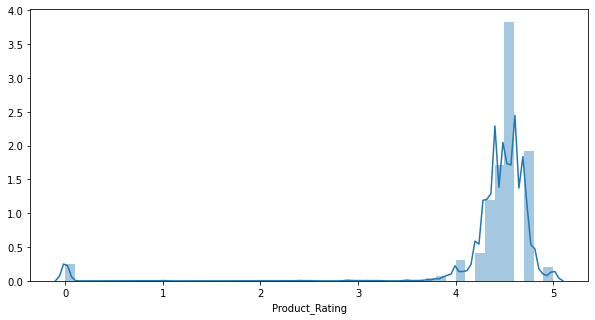

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(data["Product_Rating"])

(0.0, 1000.0)

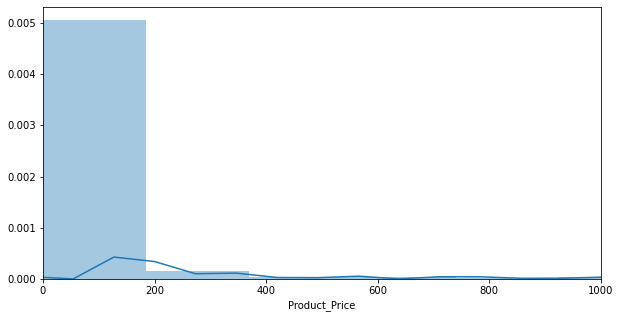

In [12]:
plt.figure(figsize=(10,5))
ax=sns.distplot(data["Product_Price"])
ax.set_xlim(0, 1000)

##### Observations : 

Product Rating - The average products have a rating of 4.3. Since we scraped the initial pages, this makes sense. Amazon arranges the products by rating by default.

Product Price - There are products starting from 5 dollars to 9242 dollars, so this is a huge range. The price mean is $123

There are clearly some errors in the scraped data. There are some zero scores. We will deal with it later, if needed

### Product name

We used the WordCloud Python library to create word clouds of the words in the title of each of the apparel type.

In [13]:
def product_join(name):
    """
    This functions takes apparel type and returns product name joined with a space
  
    """
    return " ".join(t for t in data[data["output"]==name].Product_name)

In [14]:
# Load the mask images
bag_mask = np.array(Image.open(path.join("images_note/bag.jpeg")))
hat_mask = np.array(Image.open(path.join("images_note/hat.jpeg")))
shoes_mask = np.array(Image.open(path.join("images_note/shoes.jpeg")))
tee_mask = np.array(Image.open(path.join("images_note/tee.jpeg")))
watch_mask = np.array(Image.open(path.join("images_note/watch.jpeg")))
list_masks = [bag_mask, hat_mask, shoes_mask, tee_mask, watch_mask] 
list_name=["bags", "hats", "shoes", "shirts", "watches"] 

#### The product titles are displayed like the product category's image (bags, cap, shoes, shirt, watch)

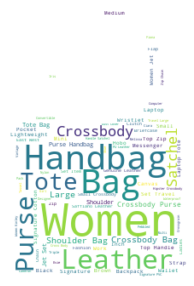

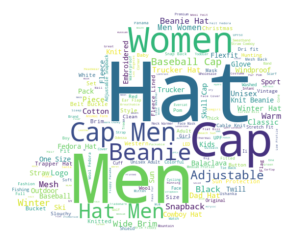

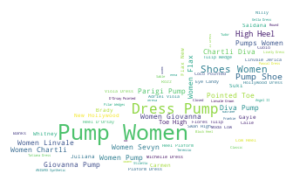

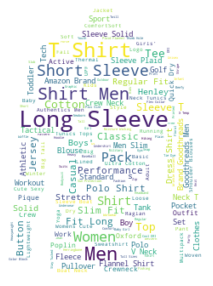

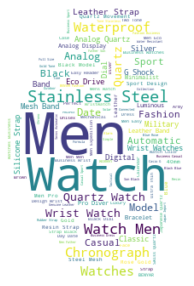

In [15]:
for i in range(len(list_masks)):
    wordcloud = WordCloud(background_color="white",  mask=list_masks[i]).generate(product_join(list_name[i]))
    plt.figure(figsize=[5,5])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Observations : The 5 images above represent the product title words in that category. The frequency of the word is proportional to the size of the text. If a word appears many times, the text is larger. The highest frequency words make a lot of sense for each of the 5 category.

#### Product category - Response variable

In [16]:
pd.DataFrame(data['output'].value_counts())

,output
watches,603
hats,553
shoes,414
bags,411
shirts,329


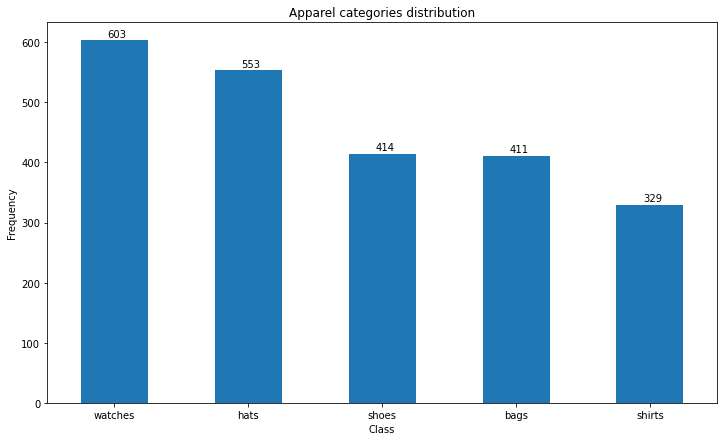

In [17]:
# Creating a plot to check class distribution
plt.figure(figsize=(12,7))# Creating an empty plot 
count_classes = pd.value_counts(data['output'], sort = True)
ax=count_classes.plot(kind = 'bar', rot=0)
plt.title("Apparel categories distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
for p in ax.patches:
      ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+6)) # Adding the count above the bars
plt.show()

Observations : The most frequent type is watches followed by hats. The least number in count are shirts. 

No further work needed for product category 


## Images

Let's display the actual image. One of each type!

In [18]:
def display_img(url):
    """
    This functions takes the image url and return the picture of the image
    """
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    return plt.imshow(img)

bags


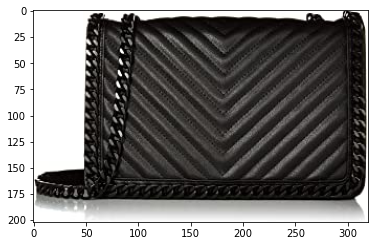

In [19]:
display_img(data['Product_Image'][1])
print(data['output'][1])

hats


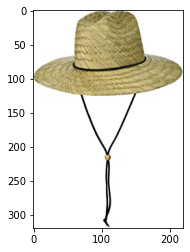

In [20]:
display_img(data['Product_Image'][500])
print(data['output'][500])

shirts


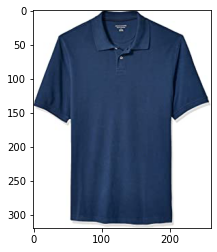

In [21]:
display_img(data['Product_Image'][1000])
print(data['output'][1000])

shoes


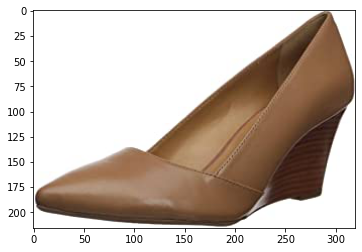

In [22]:
display_img(data['Product_Image'][1500])
print(data['output'][1500])

watches


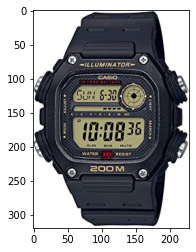

In [23]:
display_img(data['Product_Image'][2000])
print(data['output'][2000])

The pictures look great!

#### The below code is for downloading the images. We need to run it once only. if you are running it for the first time, uncomment and run

In [24]:
## downlaod images for these  data points(using id), run once
# for idx, row in data.iterrows():
#     url = row['Product_Image']
#     response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
#     img.save('C:/Users/dira9/Documents/SFSU fall 2020 semester/DS 862/Final project/amazon/images/'+ str(row['PID'])+'.jpeg')

# **Part I : Image Classification** <a class="anchor" id="1"></a>

The objective of this section to identify the correct category of product from a random image i.e. if its a watch, shoe, shirt, bag or a hat.

This section is divided into three parts:

1. Since our data has images stored as a link in a csv file, we will first create a function which extracts the images from the links and convert them into arrays.
2. In the second step we will perform the train/test split and run the classification model.
3. For the prediction part, we pick a random image from the test data, then identify it's correct category.




In [25]:
# creating a function to download the image links from the dataset
def img_array(img):   
    """
    This function takes in an image and converts the image to an array after resizing
  
    """
    response = urllib.request.urlopen(img)
    image = np.asarray(bytearray(response.read()), dtype="uint8") 
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, (224,224)) # resizing all images to one size 
    return image_bgr

In [26]:
# Using the above function here to store all the images in the dataset into arrays
image_array=[]
for i in data['Product_Image']:
    image_array.append(img_array(i))
    
img_arr=np.array(image_array)

In [27]:
# Converting the response variable into numbers
data['output'][data['output']=='bags' ]=0
data['output'][data['output']=='hats' ]=1
data['output'][data['output']=='shirts' ]=2
data['output'][data['output']=='shoes' ]=3
data['output'][data['output']=='watches' ]=4
data['output']=data['output'].astype(int)

We would be using a small training size to avoid kernel crash. To overcome the small training size(underfitting), we would increase the number of epochs in the later section during the compilation of the model.

In [28]:
# Splitting the data
train_images, test_images, train_labels, test_labels=train_test_split(img_arr, data['output'], test_size=0.60, random_state=42)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [29]:
set_seed(42) #setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=train_images[0].shape, kernel_regularizer=regularizers.l1(1e-5)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(5, activation='softmax'))

In [30]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
model = cnn.fit(train_images, train_labels, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))

Epoch 1/10
24/24 [==============================] - 38s 2s/step - loss: 1.4845 - accuracy: 0.3965 - val_loss: 1.3217 - val_accuracy: 0.6108
Epoch 2/10
24/24 [==============================] - 37s 2s/step - loss: 1.3141 - accuracy: 0.5859 - val_loss: 1.2400 - val_accuracy: 0.6703
Epoch 3/10
24/24 [==============================] - 37s 2s/step - loss: 1.2522 - accuracy: 0.6387 - val_loss: 1.2102 - val_accuracy: 0.6865
Epoch 4/10
24/24 [==============================] - 38s 2s/step - loss: 1.2470 - accuracy: 0.6482 - val_loss: 1.2204 - val_accuracy: 0.6703
Epoch 5/10
24/24 [==============================] - 37s 2s/step - loss: 1.2470 - accuracy: 0.6387 - val_loss: 1.2468 - val_accuracy: 0.6270
Epoch 6/10
24/24 [==============================] - 38s 2s/step - loss: 1.2354 - accuracy: 0.6739 - val_loss: 1.2393 - val_accuracy: 0.6649


In [31]:
# saving it in a '.h5' format file which would be used for the AI Demo during the presentation
cnn.save('model_cnn.h5')

In [32]:
# Prediction on the test image
cnn_pred = cnn.predict(test_images, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

44/44 [==============================] - 17s 389ms/step


Lets look at the training and validation loss of the fit.

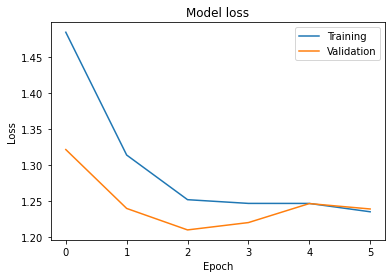

In [33]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Seems like a nice improvement throughout the epochs. The model doesn't seem to underfit or overfit.

Lets also look at the test accuracy and the confusion matrix.

In [34]:
print("Accuracy : ", cnn.evaluate(test_images, test_labels))

44/44 [==============================] - 17s 389ms/step - loss: 1.2443 - accuracy: 0.6515
Accuracy :  [1.2443325519561768, 0.6515151262283325]


The model is giving pretty decent accuracy on the test data.

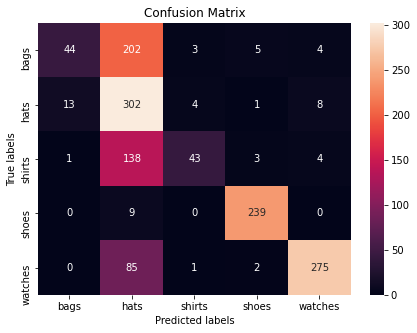

In [35]:
# Confusion matrix for results
cm = confusion_matrix(test_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['bags','hats','shirts','shoes','watches']); ax.yaxis.set_ticklabels(['bags','hats','shirts','shoes','watches']);

From the matrix above it looks our model is classifying more or less all the categories correctly. 

Let's now pick a random image from the test data and check if our model is able to identify the correct class or not.

In [36]:
test_labels=test_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(test_images), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(test_images[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 0:
      print('This is a Bag!')
    elif test_labels[idx[i]] == 1:
      print('This is a Hat!')
    elif test_labels[idx[i]] == 2:
      print('This is a Shirt!')
    elif test_labels[idx[i]] == 3:
      print('This is a Shoe!')
    elif test_labels[idx[i]] == 4:
      print('This is a Watch!')

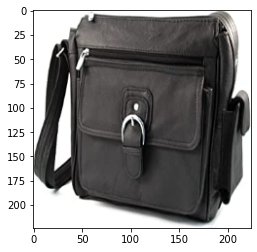

This is a Bag!


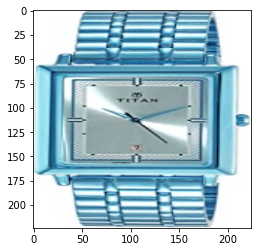

This is a Watch!


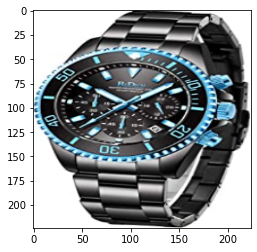

This is a Watch!


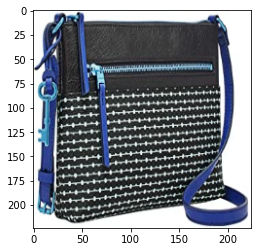

This is a Bag!


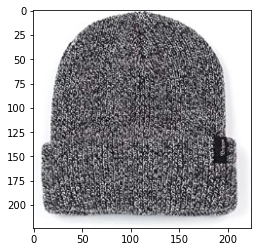

This is a Hat!


In [37]:
get_image_and_class(5)

# **Part II : Product Recommendation** <a class="anchor" id="2"></a>

## **Text Based Recommendation** <a class="anchor" id="2.1"></a>

### **Recommendation based on product title** <a class="anchor" id="2.1.1"></a>

The objective of this section is to recommend N products based on the product title.  

This method is executed with the help of the below steps:

1. The first step is to convert the product title to BoW with the help of  `CountVectorizer` in sklearn library. We will remove all the stop words and convert the text to a lowercase.
2. The next step is to calculate the cosine similarity score between the product titles. Sklearn's `metrics` is used to perform this. 
3. The final step is to build the recommendation engine. A function is created that takes in the Product ID and returns N recommendations. The similarity score is arranged in descending order and results are outputed based on score

We will display the steps for the first method to see how the results are displayed

In [38]:
count_vectorize = CountVectorizer(stop_words = 'english') # Initialize the CountVectorizer
title_vectorized = count_vectorize.fit_transform(data['Product_name']) # Run the CountVectorizer on the text
title_vectorized.shape

(2310, 2475)

There are 2310 Products and 2475 are unique words in the product name

In [39]:
#A representation of the count vectorizer
counts = pd.DataFrame(title_vectorized.toarray(),columns=count_vectorize.get_feature_names())
counts

,00,003,00508,01,01a,01e,01l,027,02a,031,...,yp,yves,zealand,zebra,zeus,zip,zipped,zipper,zone,zoop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
cosine_sim_user2 = cosine_similarity(title_vectorized, title_vectorized)

In [41]:
cosine_sim_users2_df=pd.DataFrame(cosine_sim_user2)
cosine_sim_users2_df.columns=data['Product_name']
cosine_sim_users2_df.index=data['Product_name']
cosine_sim_users2_df

Product_name,Pocket Crossbody Bag With RFID-Protected Wristlet,Women's Greenwald Crossbody Bag,Women's Evie Flap Crossbody Handbag Purse,Women's Jet Set Item Crossbody Bag,Signature Jacquard Stripe Zip File Bag,Women's Jet Set Item Lg Crossbody,Emmy Saffiano Leather Medium Crossbody Bag,Women's Kinley Small Crossbody Purse Handbag,Women's Fiona Small Crossbody Purse Handbag,Women's Signature Cotton Triple Zip Hipster Crossbody Purse,...,Dylan Stainless Steel Chronograph Watch,"Custom Photo Watch for Women Men Personalized Engraved Watch Customized Wrist Watches Stainless Steel Personalized Gift Birthday for Father, Husband, Wife, Friends",Men's Vintage A168WA-1 Electro Luminescence Watch,Men's Fashion Minimalist Wrist Watch Analog Date with Leather Strap,"Men's Classic Stainless Steel Quartz Watch with Resin Strap, Black, 21.1 (Model: W-218H-3AVCF)",Amphibian Scuba Dude Automatic Mens Wristwatch Self-Winding Military Diver Amphibia Ministry Case Wrist Watch #640,Men's TW5K94800 Digital Full-Size Black Resin Strap Watch,Mens Dress Watch Chronograph Analog Watch Dial with Date - Tachymeter 24-Hour Subdial Mens Leather Strap - Watches for Men Rialto Collection,Baume et Mercier Classima Automatic Black Dial Men's Watch 10453,Men's Square Analog Quartz Watch with Date Waterproof Calfskin Leather Band Business Wrist Watches
Product_name,,,,,,,,,,,,,,,,,,,,,
Pocket Crossbody Bag With RFID-Protected Wristlet,1.000000,0.408248,0.166667,0.333333,0.166667,0.166667,0.333333,0.166667,0.166667,0.144338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Women's Greenwald Crossbody Bag,0.408248,1.000000,0.408248,0.612372,0.204124,0.408248,0.408248,0.408248,0.408248,0.353553,...,0.000000,0.102062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Women's Evie Flap Crossbody Handbag Purse,0.166667,0.408248,1.000000,0.333333,0.000000,0.333333,0.166667,0.666667,0.666667,0.433013,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Women's Jet Set Item Crossbody Bag,0.333333,0.612372,0.333333,1.000000,0.166667,0.833333,0.333333,0.333333,0.333333,0.288675,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Signature Jacquard Stripe Zip File Bag,0.166667,0.204124,0.000000,0.166667,1.000000,0.000000,0.166667,0.000000,0.000000,0.288675,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Amphibian Scuba Dude Automatic Mens Wristwatch Self-Winding Military Diver Amphibia Ministry Case Wrist Watch #640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111803,0.153093,0.102062,0.166667,0.069338,1.000000,0.088388,0.208514,0.158114,0.138675
Men's TW5K94800 Digital Full-Size Black Resin Strap Watch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.158114,0.216506,0.288675,0.353553,0.490290,0.088388,1.000000,0.294884,0.335410,0.196116
Mens Dress Watch Chronograph Analog Watch Dial with Date - Tachymeter 24-Hour Subdial Mens Leather Strap - Watches for Men Rialto Collection,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085126,0.000000,0.000000,0.000000,...,0.279751,0.255377,0.255377,0.486534,0.231326,0.208514,0.294884,1.000000,0.263752,0.404820


Observation : The results of the product title with each other. Higher the similarity score, the more similar is the title

In [42]:
def text_recommend_1(pid, num_recommend):
    
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar items to retrieve 

    Returns product ID, title, brand and similarity score of the recommended items
    """
    cosine_sim = cosine_similarity(title_vectorized, title_vectorized)

    # initializing the empty list for recommended products and similarity score
    recommended_prod = []
    score=[]
    
    #Displaying the original product- PID, Name, Brand
    
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    print("Product ID : " , pid)
    print("Title : ", data['Product_name'][data['PID']==pid].item())
    print("Brand : ", data['Product_Brand'][data['PID']==pid].item())
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[pid]).sort_values(ascending = False)

    # getting the indexes and scores of the N most similar products
    top_10_indexes = list(score_series.iloc[1:(num_recommend+1)].index)
    top_10_score=list(score_series.iloc[1:(num_recommend+1)])
    
    # Displaying the recommended products- PID, Name, Brand and Similarity Score
    print("\n")
    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")
    
    for i in range(0,len(top_10_score)):
        recommended_prod.append(list(data['Product_name'])[i])
        print("\nProduct ID : " , top_10_indexes[i])
        print("Title : ", data['Product_name'][data['PID']==top_10_indexes[i]].item())
        print("Brand : ", data['Product_Brand'][data['PID']==top_10_indexes[i]].item())
        print("Similarity score : ",top_10_score[i])
    

In [43]:
text_recommend_1(2000,5)

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------
Product ID :  2000
Title :  10 Year Battery Quartz Watch with Resin Strap, Black, 27.2 (Model: DW-291H-9AVCF)
Brand :  Casio


-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  2159
Title :  Men's Analog-Quartz Watch with Rubber Strap, Black, 27 (Model: US9596)
Brand :  U.S. Polo Assn.
Similarity score :  0.5262348115842176

Product ID :  1868
Title :  Men's G-Shock Quartz Watch with Resin Strap, Black, 20 (Model: DW5600E-1V)
Brand :  Casio
Similarity score :  0.5017452060042545

Product ID :  1766
Title :  Men's G-Shock Quartz Watch with Resin Strap, Black, 20 (Model: DW5600E-1V)
Brand :  Casio
Similarity score :  0.5017452060042545

Product ID :  2262
Title :  Men's Data Bank Quartz Watch with R

### **Recommendation based on product title and brand** <a class="anchor" id="2.1.1"></a>

The objective of this section is to recommend N products based on the product title and product brand.  

This method is executed with the help of the below steps:

1. The first step is to convert the product title and product brand to BoW with the help of  `CountVectorizer` in sklearn library. We will remove all the stop words and convert the text to a lowercase.
2. The next step is to calculate the cosine similarity score between the product titles and between the product brands. Sklearn's `metrics` is used to perform this. 
3. The next step is calculate a combined similarity score using weighted average formula in Figure 7
4. The final step is to build the recommendation engine. A function is created that takes in the Product ID, Number of recommendation, weight of product name and weight of product brand and returns N recommendations. The similarity score is arranged in descending order and results are outputed based on score.

In [44]:
brand_vectors = CountVectorizer(stop_words = 'english')
brand_vectorized = brand_vectors.fit_transform(data['Product_Brand'])

In [45]:
def text_recommend_2(pid,num_recommend,w1,w2):
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar items to retrieve 
    w1 : Weight for the word-2-vec feature - Product name
    w2 : Weight for the word-2-vec feature - brand features

    Returns product ID, title, brand and similarity score of the recommended items
    
    """
    title_sim  = cosine_similarity(title_vectorized, title_vectorized)
    brand_sim = cosine_similarity(brand_vectorized, brand_vectorized)
    total_sim   = (w1 * title_sim +  w2 * brand_sim)/float(w1 + w2)

    # initializing the empty list for recommended products and similarity score
    recommended_prod = []
    score=[]
    
    #Displaying the original product- PID, Name, Brand
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    print("Product ID : " , pid)
    print("Title : ", data['Product_name'][data['PID']==pid].item())
    print("Brand : ", data['Product_Brand'][data['PID']==pid].item())

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(total_sim[pid]).sort_values(ascending = False)

    # getting the indexes and scores of the N most similar products
    top_indexes = list(score_series.iloc[1:(num_recommend+1)].index)
    top_score=list(score_series.iloc[1:(num_recommend+1)])
            
    # Displaying the recommended products- PID, Name, Brand and Similarity Score
    print("\n")
    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------")
    
    for i in range(0,len(top_score)):
        recommended_prod.append(list(data['Product_name'])[i])
        print("\nProduct ID : " , top_indexes[i])
        print("Title : ", data['Product_name'][data['PID']==top_indexes[i]].item())
        print("Brand : ", data['Product_Brand'][data['PID']==top_indexes[i]].item())
        print("Similarity score : ",top_score[i])
    
    

In [46]:
text_recommend_2(2000,5,0.75,0.25)

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------
Product ID :  2000
Title :  10 Year Battery Quartz Watch with Resin Strap, Black, 27.2 (Model: DW-291H-9AVCF)
Brand :  Casio


-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  1766
Title :  Men's G-Shock Quartz Watch with Resin Strap, Black, 20 (Model: DW5600E-1V)
Brand :  Casio
Similarity score :  0.6263089045031909

Product ID :  1868
Title :  Men's G-Shock Quartz Watch with Resin Strap, Black, 20 (Model: DW5600E-1V)
Brand :  Casio
Similarity score :  0.6263089045031909

Product ID :  2279
Title :  Men's Data Bank Quartz Watch with Resin Strap, Black, 18 (Model: F91WM-9A)
Brand :  Casio
Similarity score :  0.6102883460614461

Product ID :  2243
Title :  Men's Classic Quartz Watch with Resin Str

## **Image Based Recommendation** <a class="anchor" id="2.2"></a>

The objective of this section is to recommend N products based on the images of the product.  

This method is executed with the help of the below steps:

1. Since we are dealing with images, we need to extract features from the images. A pre trained model `VGG16` is used to do this.
2. The final output layer is removed as we did not intend to use these models as classifiers.With this step, we are left with the output of a convolutional layer that is pooled and reduced using a global average pooling layer followed by a flatten layer to get a linear feature vector for an image.
3. The next step is to comput the cosine similarity scores between the image features. Sklearn's `metrics` is used to perform this. 
4. The final step is to build the recommendation engine. A function is created that takes in the Product ID, Number of recommendation and returns N recommendations. The similarity score is arranged in descending order and results are outputed based on score.

In [47]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

We are loading the images that we downloaded in Step IV 

In [74]:
imgs_path = "C:/Users/Asim/Downloads/images/"
imgs_model_width, imgs_model_height = 224,224

In [62]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpeg" in x]

print("number of images:",len(files))

number of images: 2310


In [69]:
_re_digits = re.compile(r'\d+') #We use regex to extract only the pids from file names
pid = []
for element in files:
    pid += [int(n) for n in _re_digits.findall(element)]

In [70]:
# #We add the pid and the image url to a dataframe
df={'PID':pid,'Images':files}
df=pd.DataFrame(df)

In [63]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224)) #Set the image size to 224*224
    numpy_image = img_to_array(original) #Convert the images to array
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [64]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2310, 4096)

In [65]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df

,C:/Users/Asim/Downloads/images/0.jpeg,C:/Users/Asim/Downloads/images/1.jpeg,C:/Users/Asim/Downloads/images/10.jpeg,C:/Users/Asim/Downloads/images/100.jpeg,C:/Users/Asim/Downloads/images/1000.jpeg,C:/Users/Asim/Downloads/images/1001.jpeg,C:/Users/Asim/Downloads/images/1002.jpeg,C:/Users/Asim/Downloads/images/1003.jpeg,C:/Users/Asim/Downloads/images/1004.jpeg,C:/Users/Asim/Downloads/images/1005.jpeg,...,C:/Users/Asim/Downloads/images/990.jpeg,C:/Users/Asim/Downloads/images/991.jpeg,C:/Users/Asim/Downloads/images/992.jpeg,C:/Users/Asim/Downloads/images/993.jpeg,C:/Users/Asim/Downloads/images/994.jpeg,C:/Users/Asim/Downloads/images/995.jpeg,C:/Users/Asim/Downloads/images/996.jpeg,C:/Users/Asim/Downloads/images/997.jpeg,C:/Users/Asim/Downloads/images/998.jpeg,C:/Users/Asim/Downloads/images/999.jpeg
C:/Users/Asim/Downloads/images/0.jpeg,1.000000,0.533648,0.321579,0.448893,0.269362,0.285538,0.194230,0.338457,0.302047,0.275829,...,0.211540,0.190322,0.175852,0.225993,0.244877,0.287165,0.311708,0.305769,0.245456,0.234028
C:/Users/Asim/Downloads/images/1.jpeg,0.533648,1.000000,0.515729,0.606136,0.224196,0.262615,0.162948,0.283848,0.376007,0.325347,...,0.192208,0.214688,0.134489,0.182947,0.227248,0.273387,0.273122,0.295533,0.220153,0.253059
C:/Users/Asim/Downloads/images/10.jpeg,0.321579,0.515729,1.000000,0.586764,0.262314,0.353599,0.162719,0.231006,0.336558,0.270061,...,0.184713,0.167573,0.137025,0.204259,0.277883,0.229058,0.282807,0.272565,0.263261,0.241354
C:/Users/Asim/Downloads/images/100.jpeg,0.448893,0.606136,0.586764,1.000000,0.314039,0.364069,0.234348,0.349518,0.351314,0.335334,...,0.216564,0.245050,0.224541,0.204723,0.298621,0.356331,0.375469,0.288448,0.342954,0.360407
C:/Users/Asim/Downloads/images/1000.jpeg,0.269362,0.224196,0.262314,0.314039,1.000000,0.478731,0.555925,0.845358,0.602048,0.401267,...,0.563415,0.376534,0.521159,0.518916,0.626173,0.676464,0.826583,0.737324,0.907146,0.468985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C:/Users/Asim/Downloads/images/995.jpeg,0.287165,0.273387,0.229058,0.356331,0.676464,0.581841,0.650877,0.731756,0.632798,0.529906,...,0.641352,0.425129,0.614976,0.483400,0.746151,1.000000,0.852316,0.705412,0.661985,0.614074
C:/Users/Asim/Downloads/images/996.jpeg,0.311708,0.273122,0.282807,0.375469,0.826583,0.541624,0.587179,0.824161,0.630839,0.485037,...,0.602379,0.409934,0.553388,0.483752,0.688632,0.852316,1.000000,0.744435,0.801703,0.519037
C:/Users/Asim/Downloads/images/997.jpeg,0.305769,0.295533,0.272565,0.288448,0.737324,0.461475,0.528798,0.739301,0.655718,0.460905,...,0.616975,0.340351,0.423156,0.477205,0.712889,0.705412,0.744435,1.000000,0.667647,0.411998
C:/Users/Asim/Downloads/images/998.jpeg,0.245456,0.220153,0.263261,0.342954,0.907146,0.408357,0.512436,0.787658,0.557793,0.394157,...,0.485163,0.407547,0.508080,0.466297,0.569040,0.661985,0.801703,0.667647,1.000000,0.509353


In [76]:
# function to retrieve the most similar products for a given one

def image_recommend_1(pid,num_recommend = 5):
    
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar images to retrieve
    
    """
    
    given_img=df['Images'][df['PID']==pid].item()
    
    #Displaying the original product- Image, PID, Name, Brand
    
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    
    print("\nProduct ID : ",pid)
    print("Title : ",data['Product_name'][data['PID']==pid].item())
    print("Brand : ",data['Product_Brand'][data['PID']==pid].item())
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    
    # getting the indexes and scores of the N most similar products
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_recommend+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:num_recommend+1]
    
    _re_digits = re.compile(r'\d+') #We use regex to extract only the pids from file names
    closest_imgs_pid = []
    for element in closest_imgs:
        closest_imgs_pid += [int(n) for n in _re_digits.findall(element)]
    
    # Displaying the recommended products- Image, PID, Name, Brand and Similarity Score

    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------") 
    
    
    for i in range(0,len(closest_imgs)):
        print("\nProduct ID : ",closest_imgs_pid[i])
        print("Title : ",data['Product_name'][data['PID']==closest_imgs_pid[i]].item())
        print("Brand : ",data['Product_Brand'][data['PID']==closest_imgs_pid[i]].item())
        print("similarity score : ",closest_imgs_scores[i])
        
        
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
             

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  2000
Title :  10 Year Battery Quartz Watch with Resin Strap, Black, 27.2 (Model: DW-291H-9AVCF)
Brand :  Casio


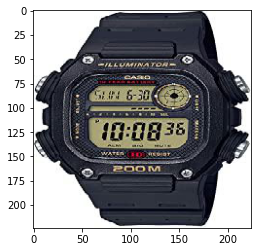

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  1906
Title :  Men's W736H Super Illuminator Watch
Brand :  Casio
similarity score :  0.91379285


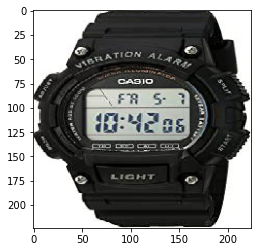


Product ID :  2304
Title :  Men's Classic Stainless Steel Quartz Watch with Resin Strap, Black, 21.1 (Model: W-218H-3AVCF)
Brand :  Casio
similarity score :  0.91091925


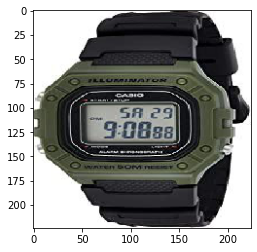


Product ID :  2253
Title :  Casio G-SHOCK VIBRATOR Digital Men's Watch GD-350-1JF (Japan Import)
Brand :  G-Shock
similarity score :  0.9105831


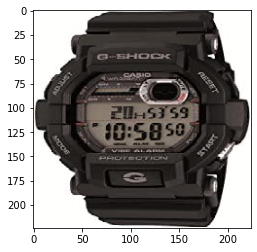


Product ID :  1933
Title :  Men's GD350-1B G Shock Black Watch
Brand :  Casio
similarity score :  0.89941144


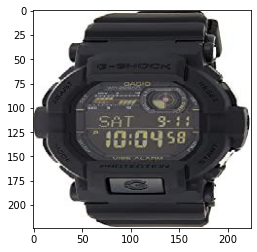


Product ID :  1766
Title :  Men's G-Shock Quartz Watch with Resin Strap, Black, 20 (Model: DW5600E-1V)
Brand :  Casio
similarity score :  0.88156956


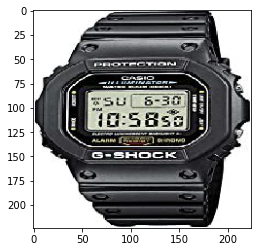

In [77]:
image_recommend_1(2000,5)

# **VII: Results** <a class="anchor" id="seven"></a>

In the final results section of the project, we printed results of the 3 recommendation engines and compared them side by side for easy reference. We took three product IDs and printed 5 recommended products ranked in order

<img src="images_note/PPT_shirt-1.png" width="3000">

                         Picture 9: Results for Product ID:1000

<img src="images_note/PPT_bag-1.png" width="2000">

                          Picture 10: Results for Product ID:200

<img src="images_note/PPT_watch-1.png" width="2000">

                          Picture 11: Results for Product ID:2000

Observations : 
    
1. The products recommended for Product ID: 1000 (Picture : 9) gives good results for the image-based recommendation method with the highest similarity score of 0.86. The text based methods produce scores of around 0.63.
2. The products recommended for Product ID: 200 (Picture : 10) gives good results for the title based recommendation method with the highest similarity score of 0.92.
3. In the third picture, the score is highest for image based recommedation system compared to the text based recommendation system.
3. In all the three pictures, the text based methods have many common results, whereas the image based is quite different.
4. Apart from the above three results, several results were printed and compared. Based on the products in our database, image based recommendation system seems to give the best results, but with the information here we can not give conclusive results.

# **VIII: Future Work** <a class="anchor" id="eight"></a>


In this section, we will discuss some work we were interested in trying in this project, but we were unable to implement due to time or knowledge constraint. 

1.  We wanted to build a recommendation engine that incorporates both the image based and text based methods.
2.  We wanted to test other recommendation engine methods like collaborative filtering (Model Based in specific)
3.  We wanted to deploy the image classification and recommendation engine on a web app using Flask


# **IX: Conclusion** <a class="anchor" id="nine"></a> 


We performed image classification and product recommendation based on images and text in our project. Although, the results produced from image based recommendation system yielded the best results here, we can not say for sure. A way to evaluate the three recommendation methods is experimentationn. Through A/B/n testing, we can make data driven decisions based on the click through rates or revenue from users in the test. 